# Exploratory Data Analysis (EDA) on Retail Sales Data

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #visualizing data 
import seaborn as sns
%matplotlib inline

### Loading Data

In [70]:
df=pd.read_csv(r"C:\Users\Tejas\Desktop\Oasis Infobyte\Retail Sales Data\Retail_sales_dataset\retail_sales_dataset.csv")

In [71]:
#finding the data in first 5 rows 
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [72]:
#giving the dimension of data i.e 1000 rows and 9 columns
df.shape

(1000, 9)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Here we can see the innformation of the data and conclude that there's no null data found in each of the columns

In [74]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Let's find total sales and total money spent

In [17]:
print("Total units sold :{}".format(df['Quantity'].sum()))
print("Total Sales amount :{}".format(df['Total Amount'].sum()))

Total units sold :2514
Total Sales amount :456000


In [21]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [23]:
df.duplicated().sum()  #gives the count of total number of duplicated rows

0

### Descriptive Statistics

In [75]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


From the above we can find the mean , 50%(median) , max(maximum of certain column) and std(standard deviation)

In [76]:
print(df.Age.mode())
print(df.Quantity.mode())
print(df['Price per Unit'].mode())
print(df['Total Amount'].mode())

0    43
1    64
Name: Age, dtype: int64
0    4
Name: Quantity, dtype: int64
0    50
Name: Price per Unit, dtype: int64
0    50
Name: Total Amount, dtype: int64


43 and 64 are the ages of people who ordered most frequently and the most frequent quantity ordered is 4 with most frequent amount per unit is 50

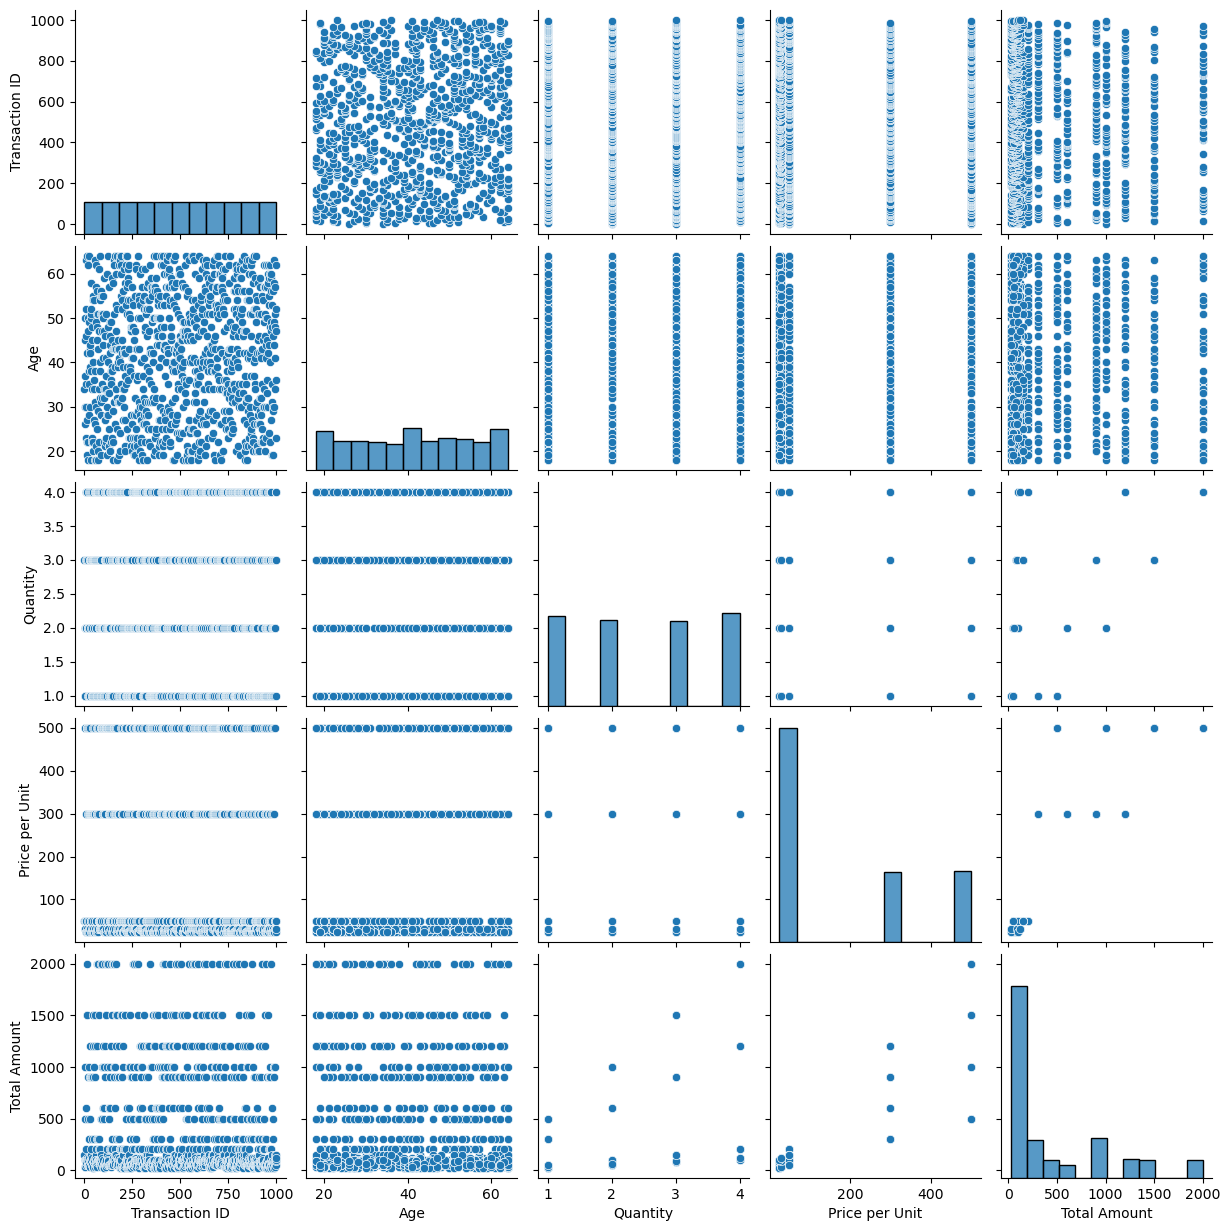

In [77]:
sns.pairplot(df)

### Customer and Product Analysis with Visuals

In [79]:
df['Product Category'].value_counts() #shows the amount of products in the given category

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

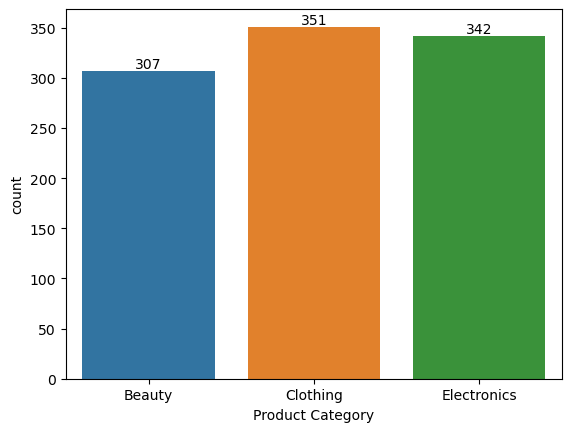

In [104]:
ax=sns.countplot(x='Product Category', data=df)

for bars in ax.containers: #so here we have created the countainer where we stored the counted values
    ax.bar_label(bars)

Basically quantity of each products are approx same

In [131]:
df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

#here we can see how much does each Male and Female spent 

,Gender,Total Amount
0,Female,232840
1,Male,223160


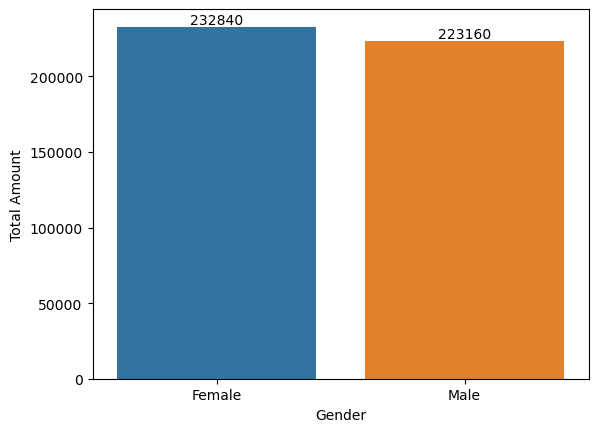

In [136]:
sales_by_gender=df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
ax=sns.barplot( x='Gender', y='Total Amount' , data=sales_by_gender)

for bars in ax.containers: #so here we have created the countainer where we stored the counted values
    ax.bar_label(bars)

So here we can see that both male and female spent approximately same amount

in the abobe visual we can see the overall spendings of Male and Females from the data

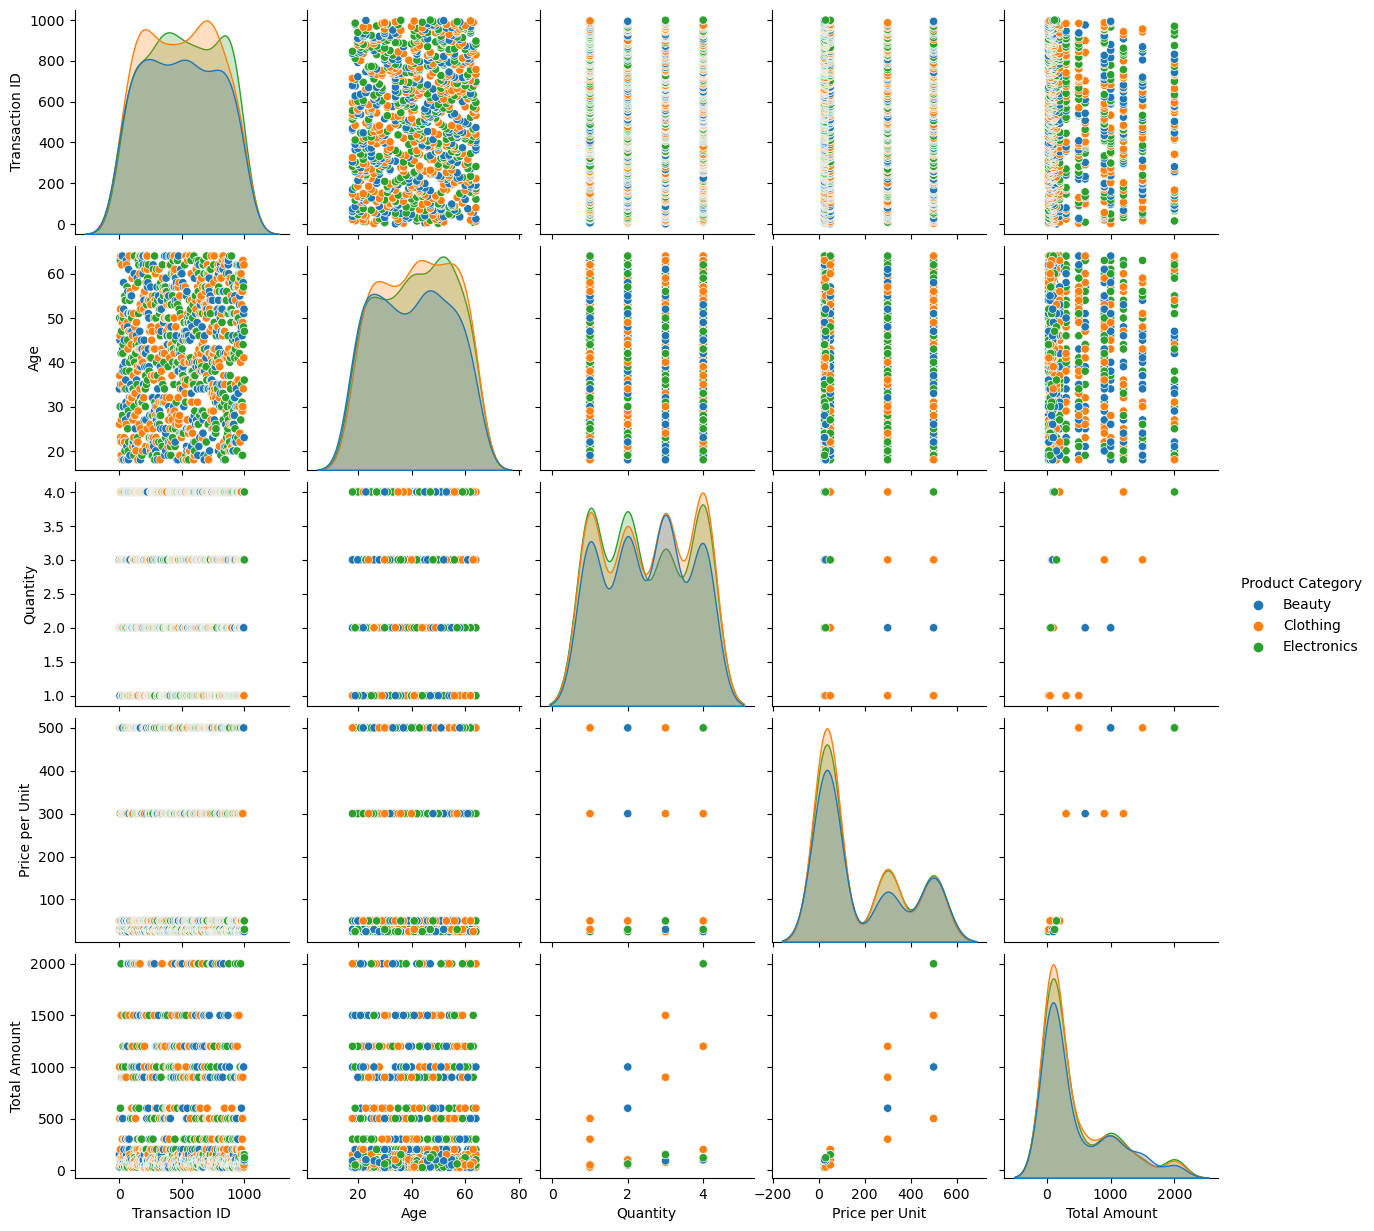

In [137]:
sns.pairplot(df , hue="Product Category") #showing visuals w.r.t Product Category

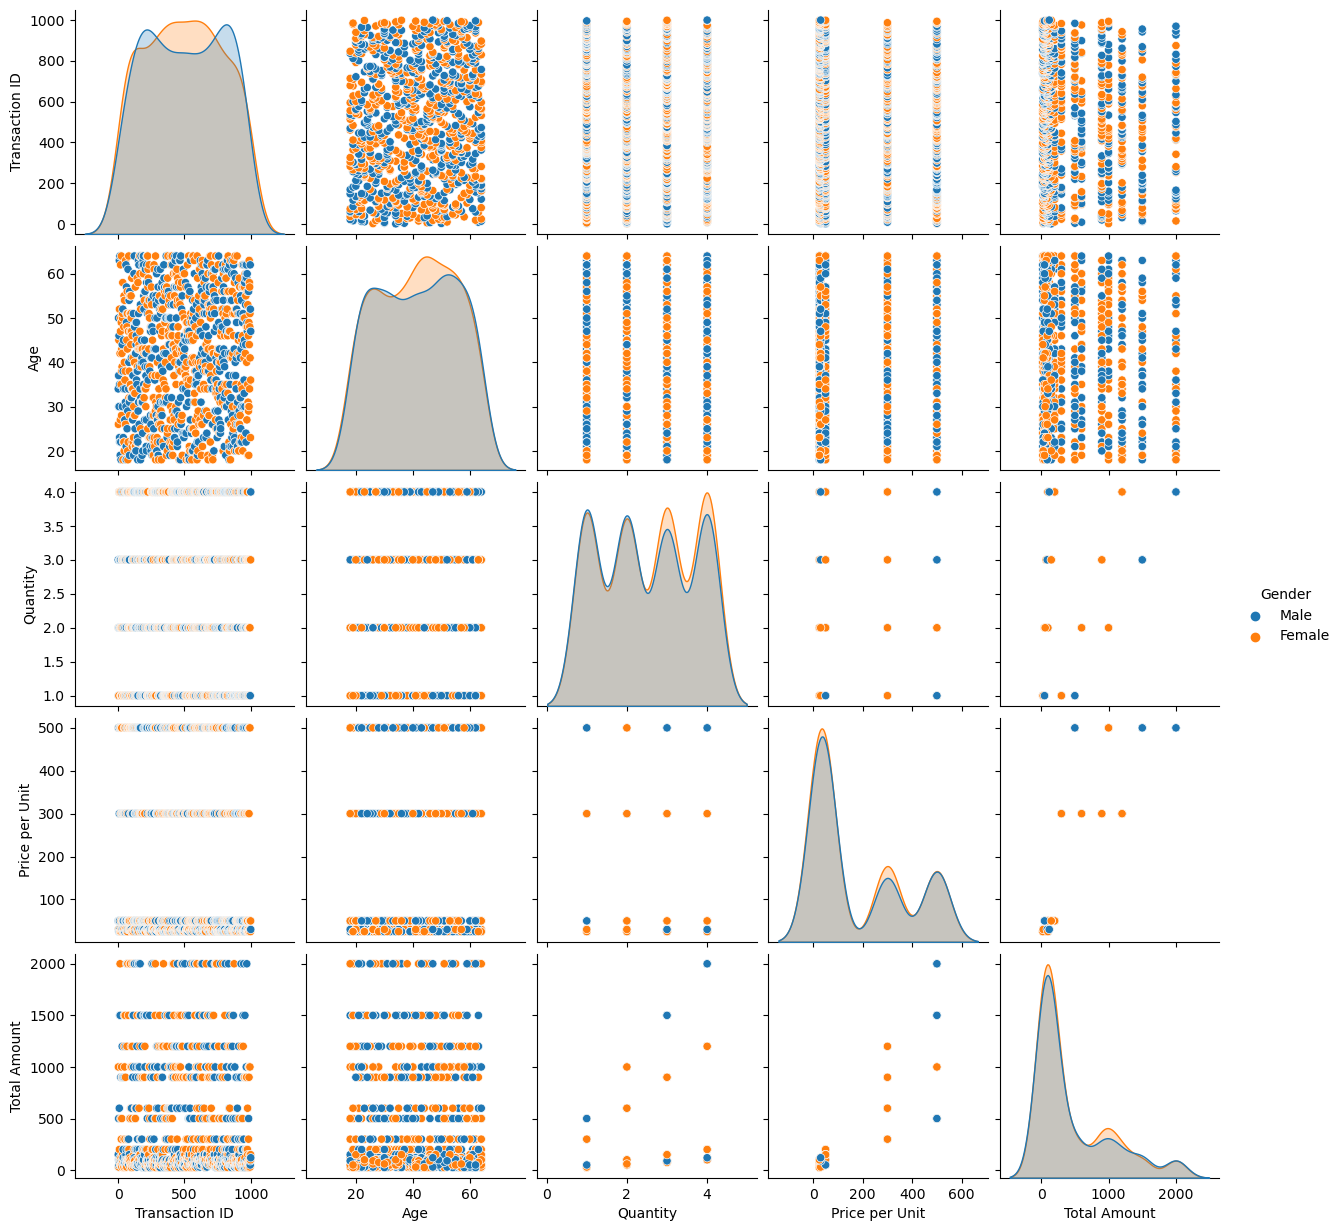

In [138]:
sns.pairplot(df , hue="Gender") #showing visuals w.r.t Gender

In [143]:
p=df.groupby('Product Category')[['Total Amount','Quantity']].sum()

In [141]:
p

,Total Amount,Quantity
Product Category,,
Beauty,143515,771
Clothing,155580,894
Electronics,156905,849


<function matplotlib.pyplot.show(close=None, block=None)>

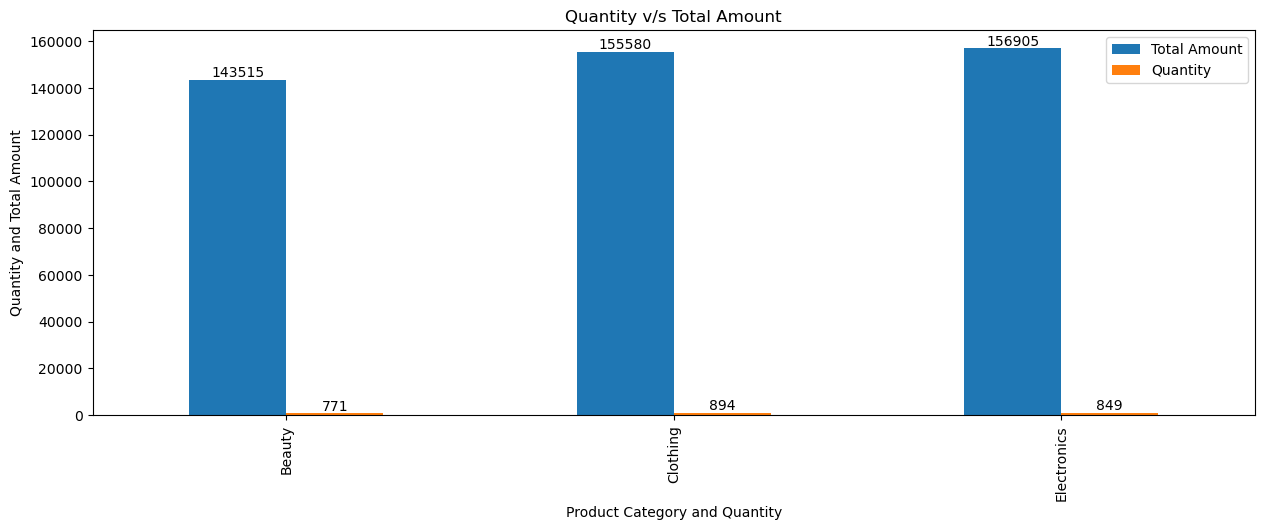

In [173]:
ax=p.plot(kind='bar', figsize=(15,5))
plt.title("Quantity v/s Total Amount")
plt.xlabel("Product Category and Quantity")
plt.ylabel("Quantity and Total Amount")
for bars in ax.containers: #so here we have created the countainer where we stored the counted values
    ax.bar_label(bars)
plt.show

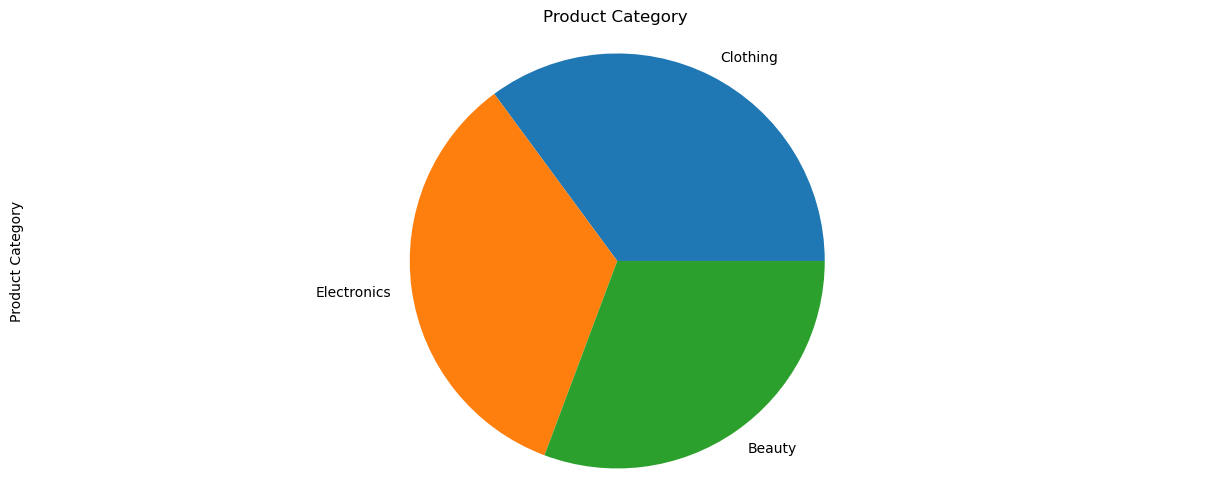

In [176]:
category=df["Product Category"].value_counts()
explode_list=[1,0,1]
colour_list=['orange','purple','red']
category.plot(kind="pie",figsize=(15,6))
plt.title("Product Category")
plt.axis("equal")
plt.show()

In [177]:
gd=df["Gender"].value_counts()
gd

Female    510
Male      490
Name: Gender, dtype: int64

Blue=Female , pink=Male


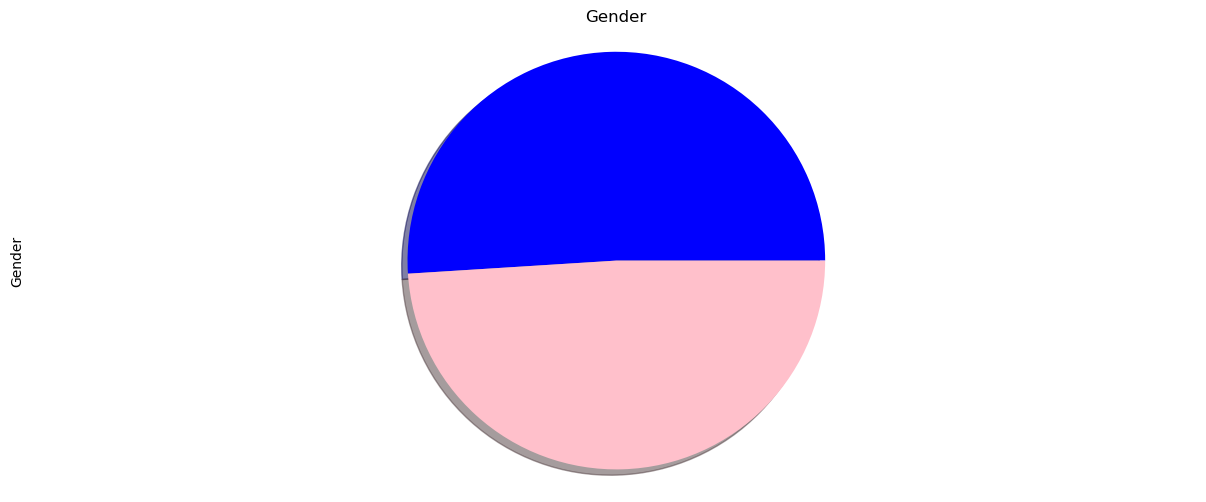

In [192]:
gd.plot(kind="pie",figsize=(15,6), shadow=True, labels=None, colors=["Blue","pink"] )
print("Blue=Female , pink=Male")
plt.title("Gender")
plt.axis("equal")
plt.show()

In [194]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [197]:
df["Price per Unit"].corr(df['Total Amount']) #correlation between unit prices and Total amount

0.8519248403554025

In [200]:
df["Quantity"].corr(df['Total Amount'])

0.37370705412140603

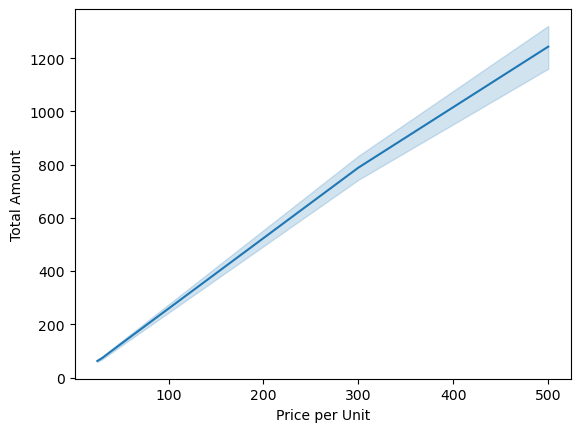

In [204]:
sns.lineplot(x="Price per Unit",y="Total Amount", data=df)
plt.show()

## Summary

1)Basically quantity of each products are approx same 
    2)Both male and female spent approximately same amount
       3)Clothing and elextronics are sold more as compaared to Beauty